<a href="https://colab.research.google.com/github/Sakshi3071/Sakshi3071-Sakshi_Satre_INBJL23_JULY23-Data-Scienece-Internship-Task-1-/blob/main/iNeuBytes_Micro_Asessments_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-1 : Implement a Machine Learning Model For Classification Problem**

In [1]:
#importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/heart.csv")
data = pd.DataFrame(df)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0




---



---



# **Step - 1 : Data Preprocessing**

In [4]:
#Shape of Dataset
print("Shape of Data :",data.shape)

Shape of Data : (1025, 14)


In [5]:
#OverView of All columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64



---



---



# **Step - 2 : Exploratory Data Analysis (EDA)**

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Using MinMaxScaler
scaler = StandardScaler()
data1 = scaler.fit_transform(df)

In [10]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

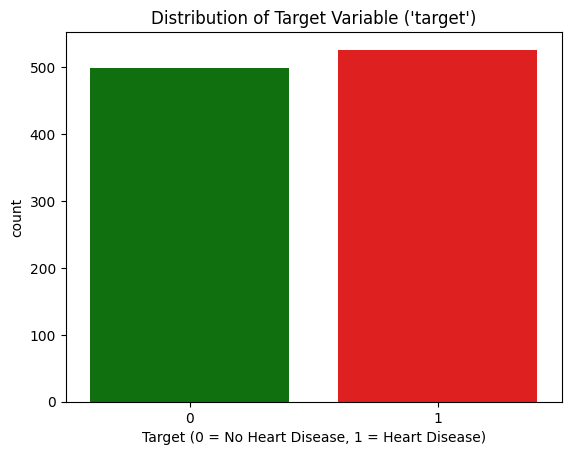

In [11]:
# Visualization Countplot of the target variable ('target')
sns.countplot(x='target', data=data,palette = ['green','red'])
plt.title("Distribution of Target Variable ('target')")
plt.xlabel("Target (0 = No Heart Disease, 1 = Heart Disease)")
plt.show()

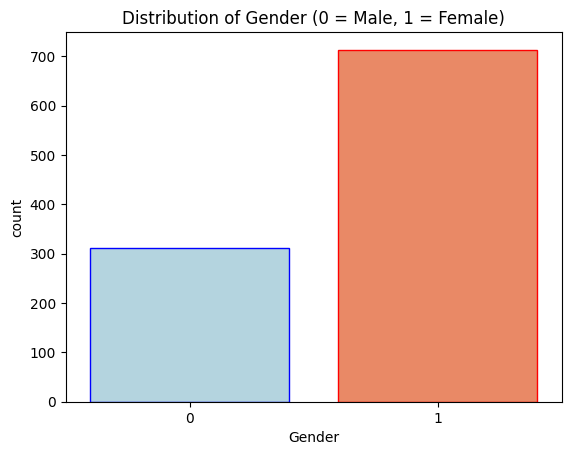

In [12]:
# Visualization Barplot of the 'sex' column
sns.countplot(x='sex', data=data, palette = ['lightblue','coral'],edgecolor = ['blue','red'])
plt.title("Distribution of Gender (0 = Male, 1 = Female)")
plt.xlabel("Gender")
plt.show()

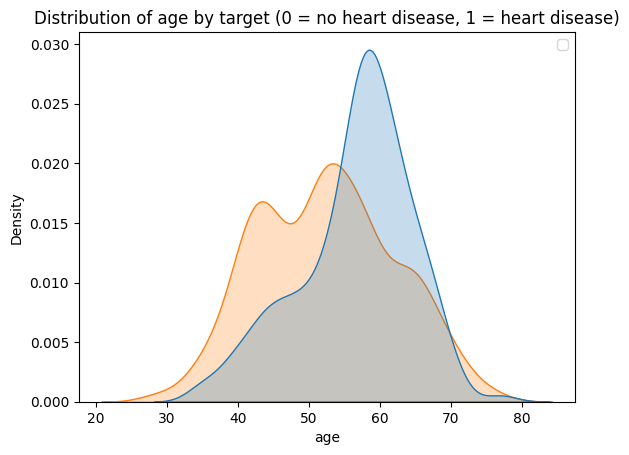

In [13]:
#sns.barplot(x=df['target'], y=df['sex'].astype('int64'))
sns.kdeplot(data=data, x='age', hue='target', fill=True)
plt.legend()
plt.title("Distribution of age by target (0 = no heart disease, 1 = heart disease)");

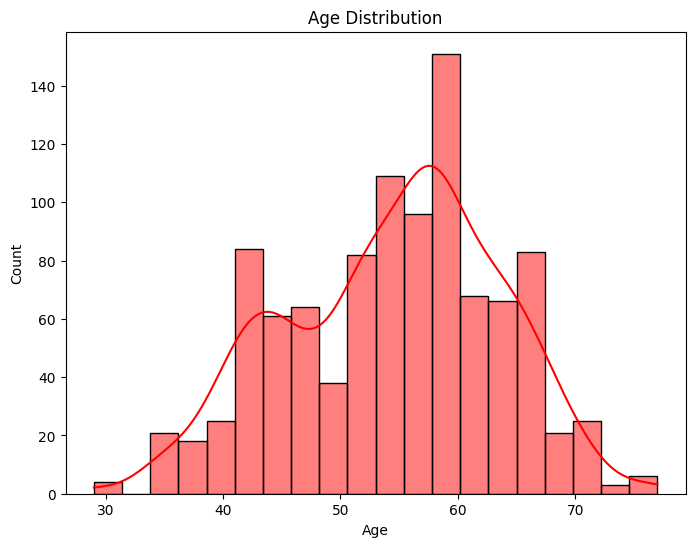

In [14]:
#  Histogram of Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True,color = 'red')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show();

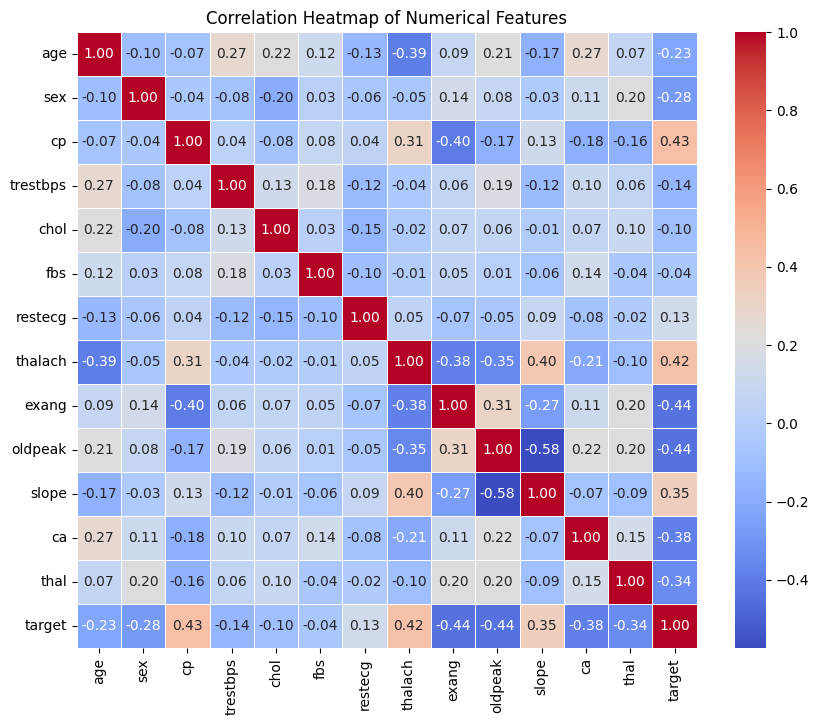

In [15]:
# Correlation Heatmap of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

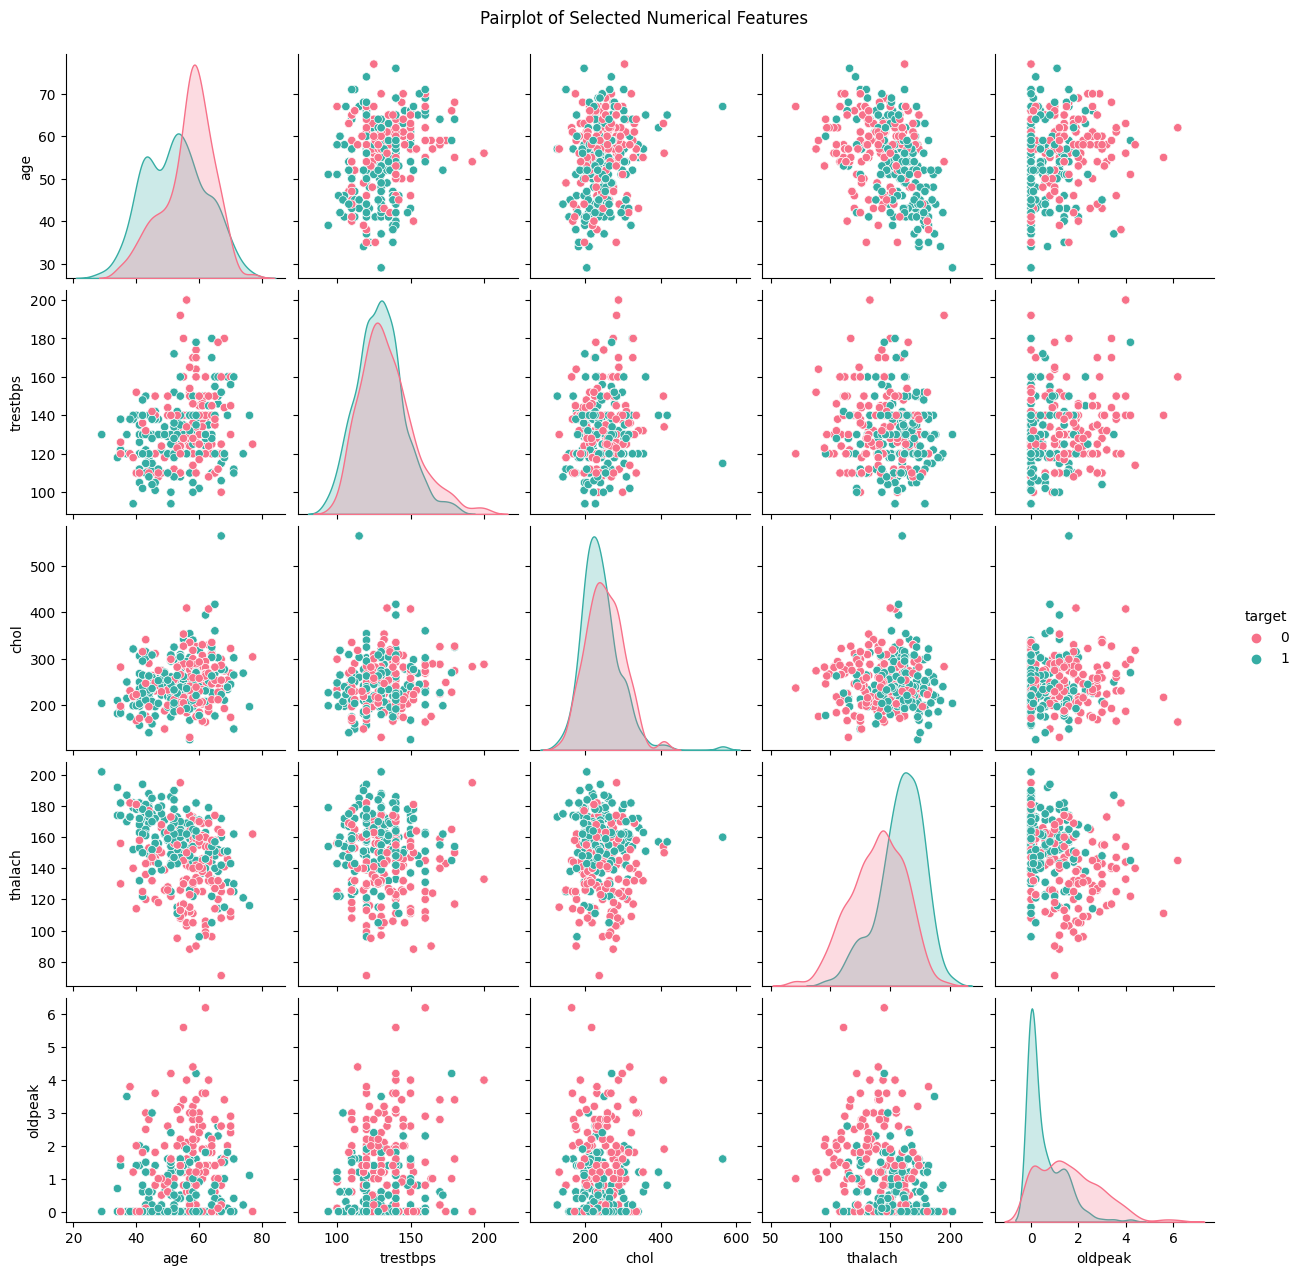

In [16]:
#Pairplot of a subset of features
subset_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create the pairplot for each class
sns.pairplot(data, hue='target', vars=subset_features, diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

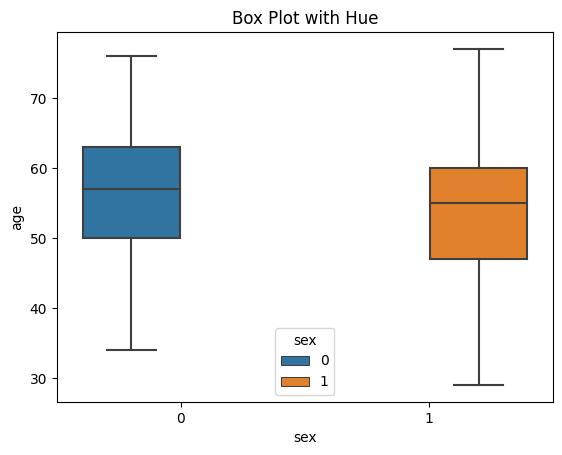

In [17]:
# Boxplot with hue
sns.boxplot(x='sex', y='age', hue='sex', data=data)
plt.title("Box Plot with Hue")
plt.show();


1    0.513171
0    0.486829
Name: target, dtype: float64


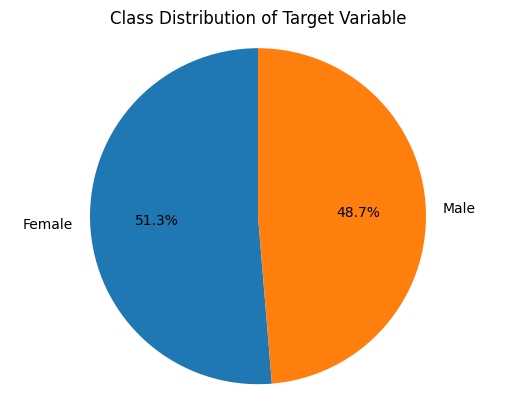

In [18]:
# Calculate Class Proportions:
class_proportions = data['target'].value_counts(normalize=True)
print(class_proportions)

# Create a pie chart to visualize the class distribution
plt.pie(class_proportions, labels=['Female','Male'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.title("Class Distribution of Target Variable")
plt.show();



---



---




# **Step - 3 : Model Implementation**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [20]:
#Selceting Features
X = data.drop('target', axis=1)
y = data['target']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Shape of Train and TEst data
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (820, 13)
Shape of X_test : (205, 13)
Shape of y_train : (820,)
Shape of y_test : (205,)


In [23]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---



---



# **Step 4 : Model Evaluation**



---

---

**1. K-Neighbors Classifier :**

---


In [24]:
# Implement and evaluate K-Nearest Neighbors (KNN) model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [25]:
knn_predictions = knn_classifier.predict(X_test_scaled)



---

**Model Evaluation :**

---


In [26]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)

K-Nearest Neighbors (KNN) Accuracy: 0.8341463414634146


In [27]:
# Classification Report
Cr_knn = classification_report(y_test, knn_predictions)
print(Cr_knn)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [28]:
# ROC-AUC score for K-Nearest Neighbors (KNN) model
knn_roc_auc = roc_auc_score(y_test, knn_classifier.predict_proba(X_test_scaled)[:, 1])
print("K-Nearest Neighbors (KNN) ROC-AUC:", knn_roc_auc)

K-Nearest Neighbors (KNN) ROC-AUC: 0.9485532076908434


In [29]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_predictions)
print(cm_knn)

[[79 23]
 [11 92]]




---

**Cross Validation & Overfitting Check :**

---



In [30]:
# Model Evaluation on the testing set
initial_accuracy = knn_classifier.score(X_test_scaled, y_test)
print("Initial Accuracy:", initial_accuracy)

Initial Accuracy: 0.8341463414634146


In [31]:
# Overfitting Check
training_accuracy = knn_classifier.score(X_train_scaled, y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.948780487804878


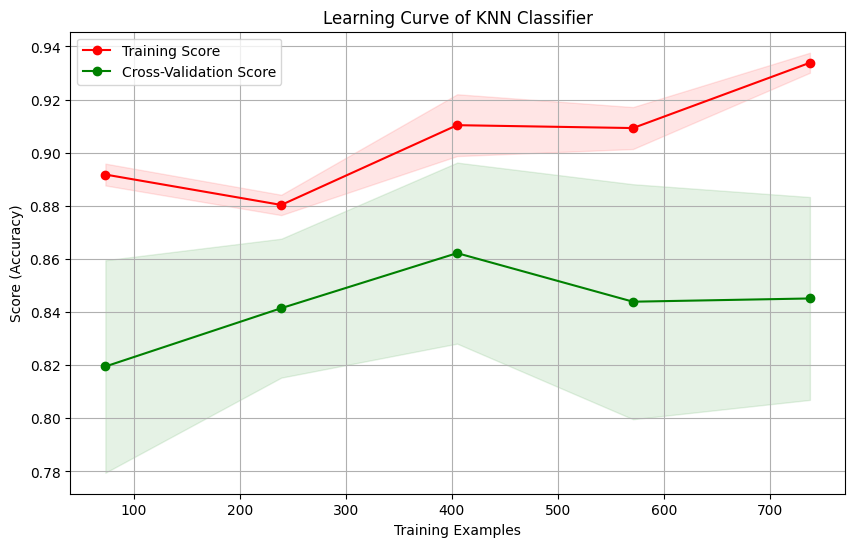

In [32]:
import numpy as np
from sklearn.model_selection import learning_curve,cross_val_score

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes,
                                                            scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score (Accuracy)")
    plt.title("Learning Curve of KNN Classifier")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.legend(loc="best")
    plt.show()


plot_learning_curve(knn_classifier, X_train_scaled, y_train, cv=10)



K=1: Average Cross-Validation Accuracy=0.9878048780487806
K=2: Average Cross-Validation Accuracy=0.9621951219512195
K=3: Average Cross-Validation Accuracy=0.9182926829268293
K=4: Average Cross-Validation Accuracy=0.8707317073170732
K=5: Average Cross-Validation Accuracy=0.8451219512195122
K=6: Average Cross-Validation Accuracy=0.8585365853658538
K=7: Average Cross-Validation Accuracy=0.8585365853658538
K=8: Average Cross-Validation Accuracy=0.853658536585366
K=9: Average Cross-Validation Accuracy=0.8658536585365854
K=10: Average Cross-Validation Accuracy=0.8621951219512196
K=11: Average Cross-Validation Accuracy=0.8682926829268294
K=12: Average Cross-Validation Accuracy=0.878048780487805
K=13: Average Cross-Validation Accuracy=0.874390243902439
K=14: Average Cross-Validation Accuracy=0.8707317073170732
K=15: Average Cross-Validation Accuracy=0.8646341463414634
K=16: Average Cross-Validation Accuracy=0.8609756097560975
K=17: Average Cross-Validation Accuracy=0.8573170731707316
K=18: Ave

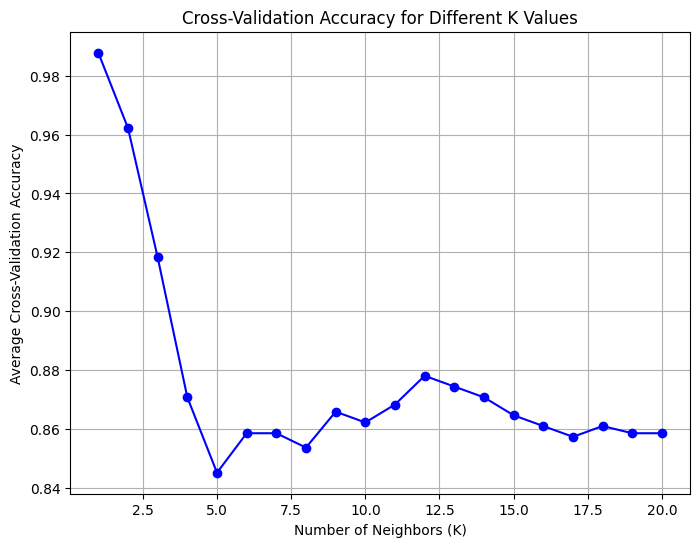

In [33]:
# Initialize an empty list to store cross-validation accuracies
cv_accuracies = []

# Find the optimal number of neighbors (K) using cross-validation
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')
    average_cv_accuracy = np.mean(cv_scores)
    cv_accuracies.append(average_cv_accuracy)
    print(f"K={k}: Average Cross-Validation Accuracy={average_cv_accuracy}")

# Plot the cross-validation accuracies for different K values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), cv_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different K Values')
plt.grid(True)
plt.show();




In [34]:
#optimal K value (e.g., 7 based on the plot)
optimal_k = 7

# Retrain the KNN model with the optimal K value
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
final_accuracy = knn_classifier.score(X_test_scaled, y_test)
print("Final Accuracy:", final_accuracy)


Final Accuracy: 0.824390243902439




---

---
**2. Naive Bayes Classifier :**

---

In [35]:
# Implement and evaluate Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [36]:
nb_predictions = nb_classifier.predict(X_test)


---

**Model Evaluation :**

---


In [37]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8


In [38]:
#Classification Report
Cr_nb = classification_report(y_test, nb_predictions)
print(Cr_nb)

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [39]:
# ROC-AUC score for Naive Bayes model
nb_roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
print("Naive Bayes ROC-AUC:", nb_roc_auc)

Naive Bayes ROC-AUC: 0.8705501618122977


In [40]:
#Confusion matrix
cm_nb = confusion_matrix(y_test, nb_predictions)
print(cm_nb)

[[72 30]
 [11 92]]


---

**Cross Validation & Overfitting Check :**

---



In [41]:
# Model Evaluation on the testing set
initial_accuracy = nb_classifier.score(X_test_scaled, y_test)
print("Initial Accuracy:", initial_accuracy)

Initial Accuracy: 0.4975609756097561


In [42]:
#Overfitting Check
training_accuracy = nb_classifier.score(X_train_scaled, y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.4878048780487805


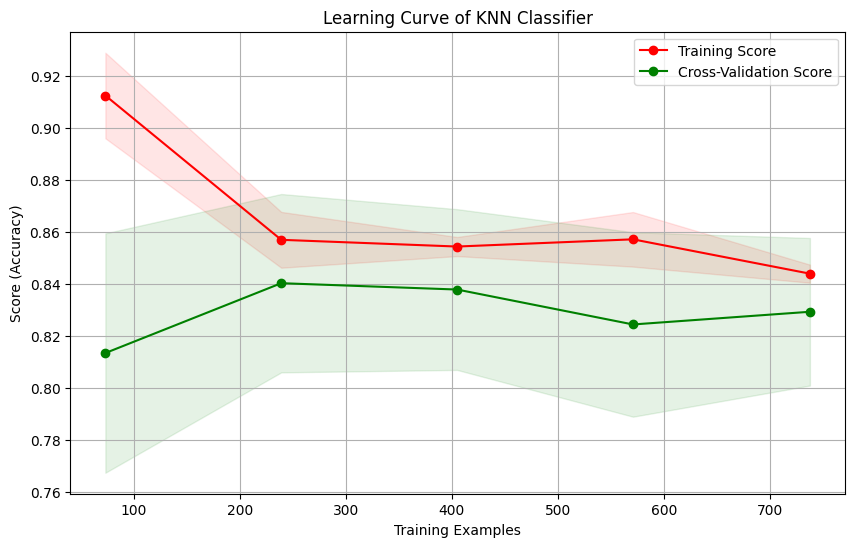

In [43]:
#plotting Learning Curve
plot_learning_curve(nb_classifier, X_train_scaled, y_train, cv=10)


---


---

**3. Decision Tree Classifier :**

---

In [44]:
# Implement and evaluate Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
dt_predictions = dt_classifier.predict(X_test)

---

**Model Evaluation :**

---



In [46]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9853658536585366


In [47]:
#Classification Report
Cr_dtc = classification_report(y_test, dt_predictions)
print(Cr_dtc)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [48]:
# ROC-AUC score for Decision Tree model
dt_roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
print("Decision Tree ROC-AUC:", dt_roc_auc)

Decision Tree ROC-AUC: 0.9854368932038835


In [49]:
#Confusion Matrix
cm_dtc = confusion_matrix(y_test, dt_predictions)
print(cm_dtc)

[[102   0]
 [  3 100]]


---

**Cross Validation & Overfitting Check :**

---



In [50]:
# Model Evaluation on the testing set
initial_accuracy = dt_classifier.score(X_test_scaled, y_test)
print("Initial Accuracy:", initial_accuracy)

Initial Accuracy: 0.37073170731707317


In [51]:
#Overfitting Check
training_accuracy = dt_classifier.score(X_train_scaled, y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.32439024390243903


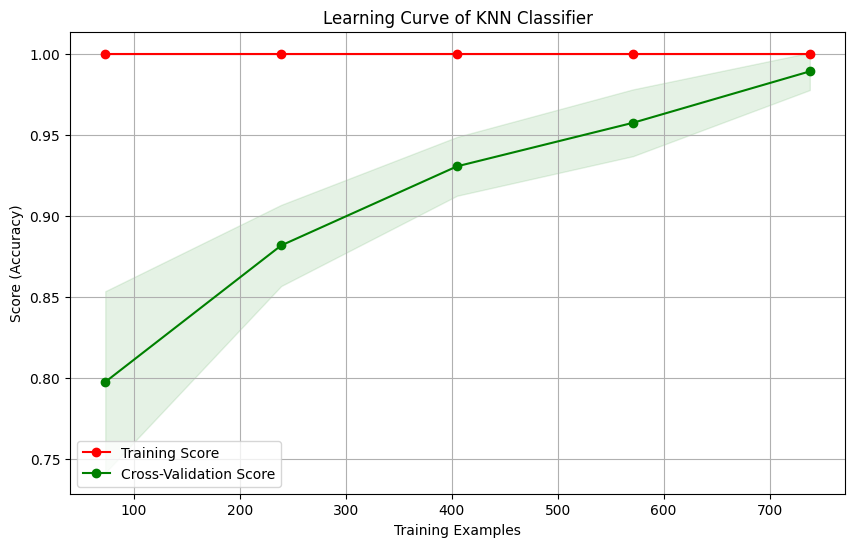

In [52]:
#Plotting Learning curve
plot_learning_curve(dt_classifier, X_train_scaled, y_train, cv=10)



---



---



---

